Summary Statistics:
          start_x     start_y      start_z          px          py  \
count  194.000000  194.000000   194.000000  194.000000  194.000000   
mean   -19.398843   -7.100049   746.690006    0.006533   -0.072143   
std    205.390939  350.056428   400.609731    0.119416    0.089954   
min   -357.026000 -602.368000     7.336780   -0.165094   -0.193573   
25%   -206.826000 -302.115750   410.853250   -0.111117   -0.162982   
50%    -12.952200  -14.812490   763.638000    0.010089   -0.081485   
75%    143.368500  316.749500  1102.645000    0.105718    0.019017   
max    347.065000  593.390000  1384.960000    0.186960    0.060501   

               pz  total_momentum      stop_x      stop_y       stop_z  \
count  194.000000    1.940000e+02  194.000000  194.000000   194.000000   
mean     0.065028    2.000000e-01  -18.741912  -15.269390   752.923267   
std      0.091270    2.782739e-17  205.848568  348.720761   400.970196   
min     -0.058415    2.000000e-01 -356.022000 -610.04

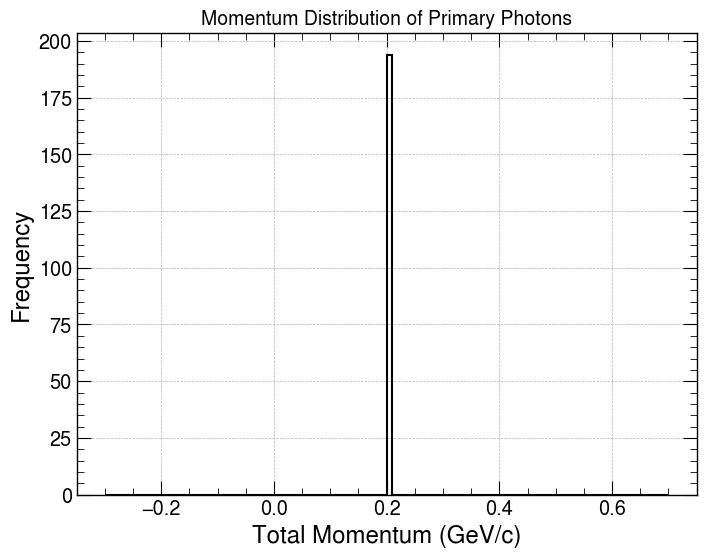

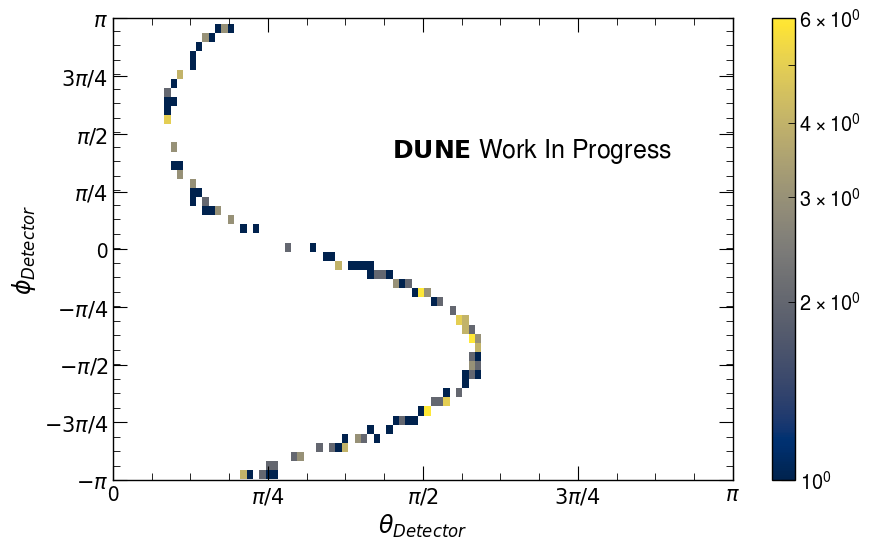

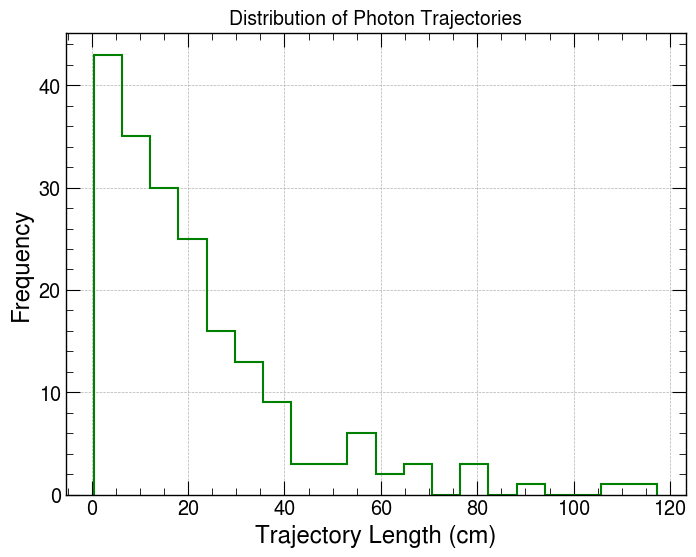

In [30]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dunestyle.matplotlib as dunestyle
from matplotlib import colors 
import math

def parse_log_file(filename):
    """Parses the log file and extracts relevant MCParticle information."""
    data = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if "created via primary" in lines[i]:
                match_pos = re.search(r"created via primary.*?at \( ([-0-9.e]+), ([-0-9.e]+), ([-0-9.e]+); 0 \) cm", lines[i])
                match_mom = re.search(r"momentum \( ([-0-9.e]+), ([-0-9.e]+), ([-0-9.e]+); ([0-9.e]+) \) GeV/c", lines[i])
                match_stop = re.search(r"stops by conv at \( ([-0-9.e]+), ([-0-9.e]+), ([-0-9.e]+);", lines[i+1])
                
                if match_pos and match_mom and match_stop:
                    start_x, start_y, start_z = map(float, match_pos.groups())
                    px, py, pz, total_momentum = map(float, match_mom.groups())
                    stop_x, stop_y, stop_z = map(float, match_stop.groups())
                    
                    trajectory_length = np.sqrt((stop_x - start_x)**2 + (stop_y - start_y)**2 + (stop_z - start_z)**2)
                    
                    data.append({
                        'start_x': start_x, 'start_y': start_y, 'start_z': start_z,
                        'px': px, 'py': py, 'pz': pz,
                        'total_momentum': total_momentum,
                        'stop_x': stop_x, 'stop_y': stop_y, 'stop_z': stop_z,
                        'trajectory_length': trajectory_length
                    })
    return pd.DataFrame(data)

def analyze_data(df):
    """Performs various analyses on the extracted data."""
    df['theta'] = np.degrees(np.arccos(df['pz'] / df['total_momentum']))
    df['phi'] = np.degrees(np.arctan2(df['py'], df['px']))
    
    print("Summary Statistics:")
    print(df.describe())
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.hist(df['total_momentum'], bins=100, histtype='step')
    plt.xlabel("Total Momentum (GeV/c)")
    plt.ylabel("Frequency")
    plt.title("Momentum Distribution of Primary Photons", fontsize = 14)
    plt.grid(True)
    plt.show()
    
    fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
    h = ax.hist2d(df['theta']*math.pi/180, df['phi']*math.pi/180, bins = (50,50),  norm = colors.LogNorm(), label = ' GC Position')
    ax.set_xlabel(r'$\theta_{Detector}$', fontsize = 17)
    ax.set_ylabel(r'$\phi_{Detector}$', fontsize = 17)
    ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
    ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
    ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
    ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
    dunestyle.WIP(x=0.45, y=0.70)
    fig.colorbar(h[3], ax=ax)
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.hist(df['trajectory_length'], bins=20, histtype='step', edgecolor='g')
    plt.xlabel("Trajectory Length (cm)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Photon Trajectories", fontsize = 14)
    plt.grid(True)
    plt.show()
    
    return df

# Example usage
filename = "DumpMCParticles_polar.log"
data_df = parse_log_file(filename)
analyzed_df = analyze_data(data_df)


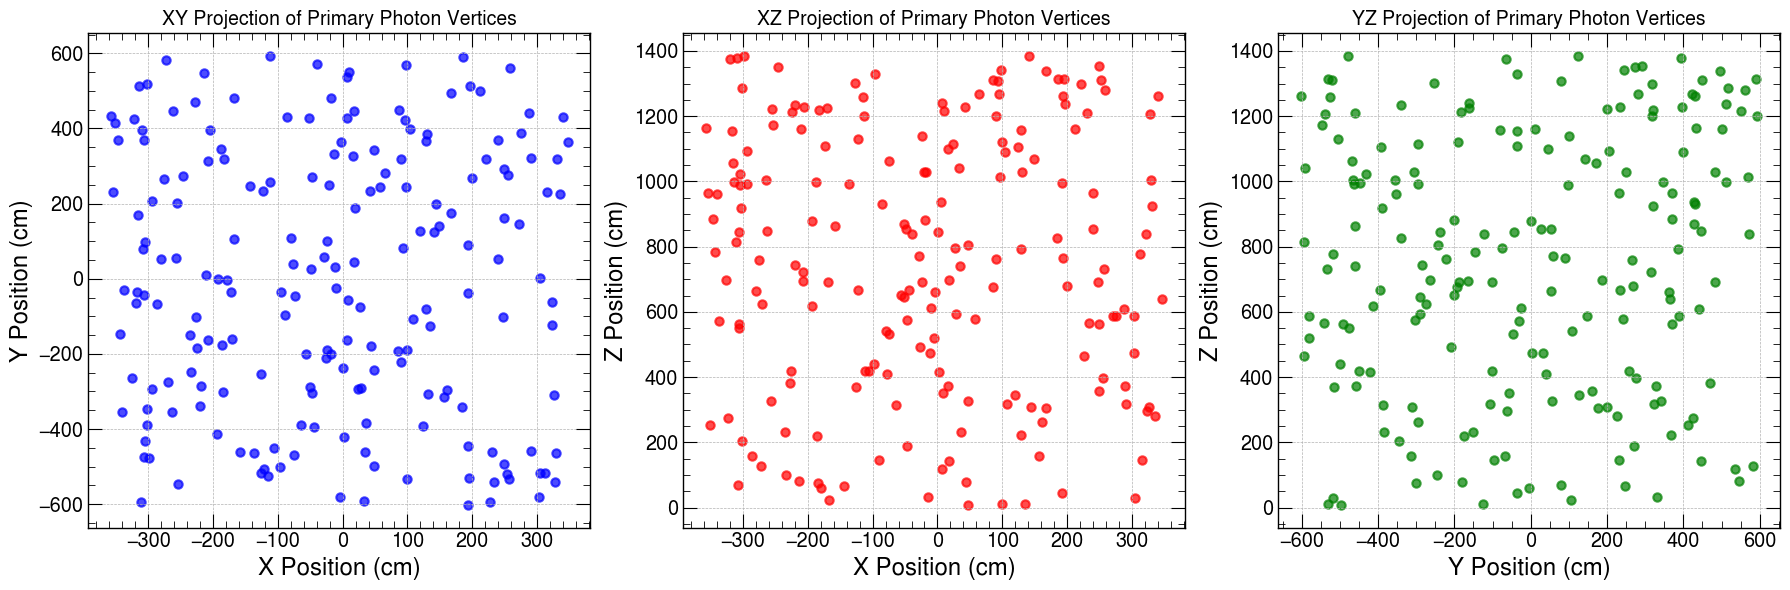

In [ ]:

# Extracting primary vertex positions
primary_vertices = data_df[['start_x', 'start_y', 'start_z']]


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# XY Projection
axs[0].scatter(primary_vertices['start_x'], primary_vertices['start_y'], c='b', alpha=0.7)
axs[0].set_xlabel("X Position (cm)")
axs[0].set_ylabel("Y Position (cm)")
axs[0].set_title("XY Projection of Primary Photon Vertices", fontsize = 14)
axs[0].grid(True)

# XZ Projection
axs[1].scatter(primary_vertices['start_x'], primary_vertices['start_z'], c='r', alpha=0.7)
axs[1].set_xlabel("X Position (cm)")
axs[1].set_ylabel("Z Position (cm)")
axs[1].set_title("XZ Projection of Primary Photon Vertices", fontsize = 14)
axs[1].grid(True)

# YZ Projection
axs[2].scatter(primary_vertices['start_y'], primary_vertices['start_z'], c='g', alpha=0.7)
axs[2].set_xlabel("Y Position (cm)")
axs[2].set_ylabel("Z Position (cm)")
axs[2].set_title("YZ Projection of Primary Photon Vertices", fontsize = 14)
axs[2].grid(True)

plt.tight_layout()

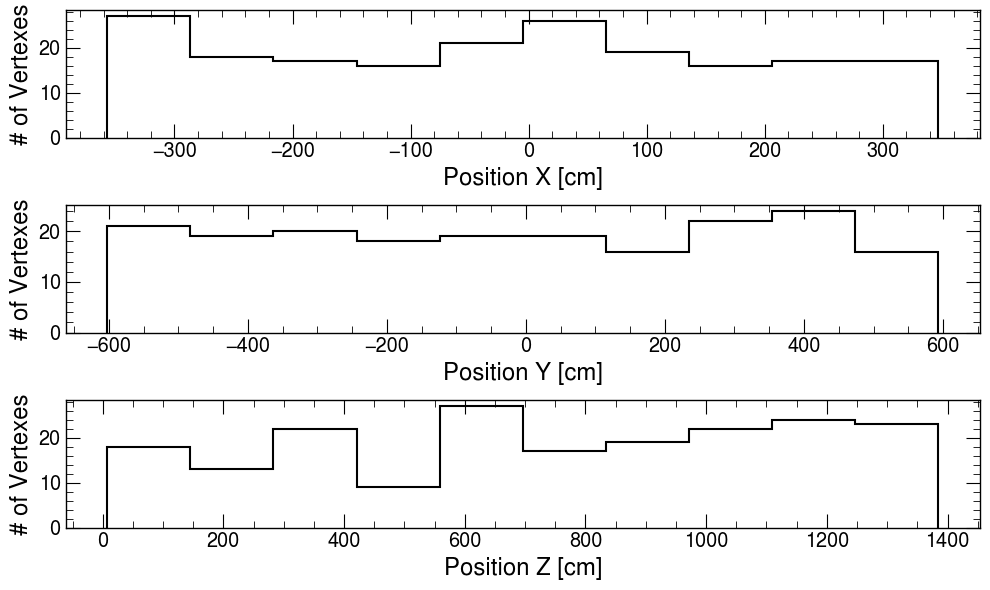

In [31]:
fig, ax = plt.subplots(3, figsize=(10, 6))

ax[0].hist(primary_vertices['start_x'],histtype='step', bins = 10)
ax[0].set_xlabel("Position X [cm]")
ax[0].set_ylabel("# of Vertexes")

ax[1].hist(primary_vertices['start_y'], histtype='step',bins = 10)
ax[1].set_xlabel("Position Y [cm]")
ax[1].set_ylabel("# of Vertexes")

ax[2].hist(primary_vertices['start_z'],histtype='step', bins = 10)
ax[2].set_xlabel("Position Z [cm]")
ax[2].set_ylabel("# of Vertexes")

fig.tight_layout()